### K-Means Clustering

K-Means is one of the simplest and most popular unsupervised clustering algorithms. K-Means groups similar data points together by finding a set number (K) of cluster centers that minimize the distance between points and their assigned center. The algorithm starts by randomly placing K cluster centers (centroids) in the data space. It then alternates between two steps: assigning each data point to its nearest centroid, and then moving each centroid to the average position of all points assigned to it. These two steps repeat until the centroids stop moving significantly or a maximum number of iterations is reached. K-Means requires you to specify the number of clusters in advance, which can be challenging if you don't know the natural groupings in your data.

*   **Use Cases:** Use K-Means when you need to discover groups in your data without predefined labels and when you expect roughly equal-sized, spherical clusters. It's appropriate when you have a general idea of how many clusters might exist and when your dataset is not too large. K-Means assumes clusters are spherical and of similar size and density. It assumes the variance of the distribution of each attribute is spherical. K-Means assumes that the mean or centroid is a sufficient statistic to represent the cluster. It assumes that clusters are separable by Euclidean distance. K-Means also assumes that assignments of data points to the nearest cluster centroid results in a partitioning that reflects the natural structure of the data.
*   **Pros:**
    - Simple to understand and implement
    - Scales well to large datasets
    - Guarantees convergence, though it may be to a local minimum
    - Easily adapts to new examples (online learning)
    - Generally fast and computationally efficient
    - Works well when clusters are well-separated and have roughly spherical shapes
*   **Cons:**
    - Requires specifying the number of clusters (K) in advance
    - Sensitive to initial placement of centroids
    - May converge to local optima rather than global optimum
    - Cannot handle non-spherical clusters well
    - Sensitive to outliers that can significantly shift centroids
    - All points contribute equally to the centroid (no concept of outliers or noise)
    - Clusters are assumed to have similar sizes and densities, which is often not true in real data
    
    | **Best Practice**                                                           |
    | --------------------------------------------------------------------------- |
    | Scale features to avoid dominance using `StandardScaler`.                   |
    | Use the elbow method or silhouette score to determine optimal `n_clusters`. |
    | Set `n_init=10–20` to avoid bad initializations.                            |
    | Use PCA or t-SNE to reduce high-dimensional data before clustering.         |
    | Set `init='k-means++'` for smarter initial centroids.                       |
    | Use `max_iter=300` and `tol=1e-4` to control convergence.                   |


In [1]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=200, centers=4, n_features=2, random_state=42 ,cluster_std=1.8)
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y
df.head()

,feature1,feature2,target
0,7.998273,2.826069,1
1,-7.224739,10.493711,0
2,-8.860372,5.708465,3
3,-11.444880,4.790088,3
4,-7.940484,-5.350826,2


<Axes: xlabel='feature1', ylabel='feature2'>

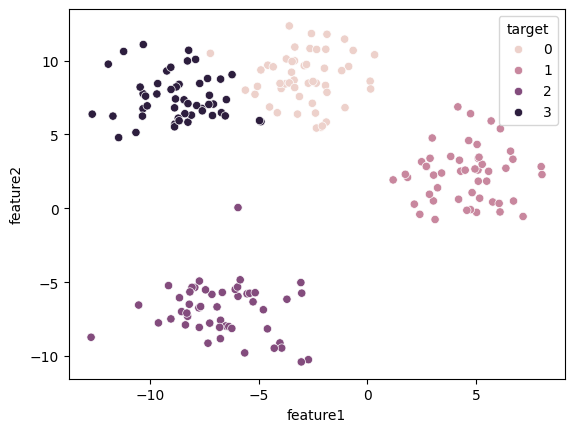

In [3]:
sns.scatterplot(data=df, x='feature1', y='feature2',hue='target')
# Plot the data points with different colors for each cluster

Text(0.5, 1.0, 'KMeans Clusters')

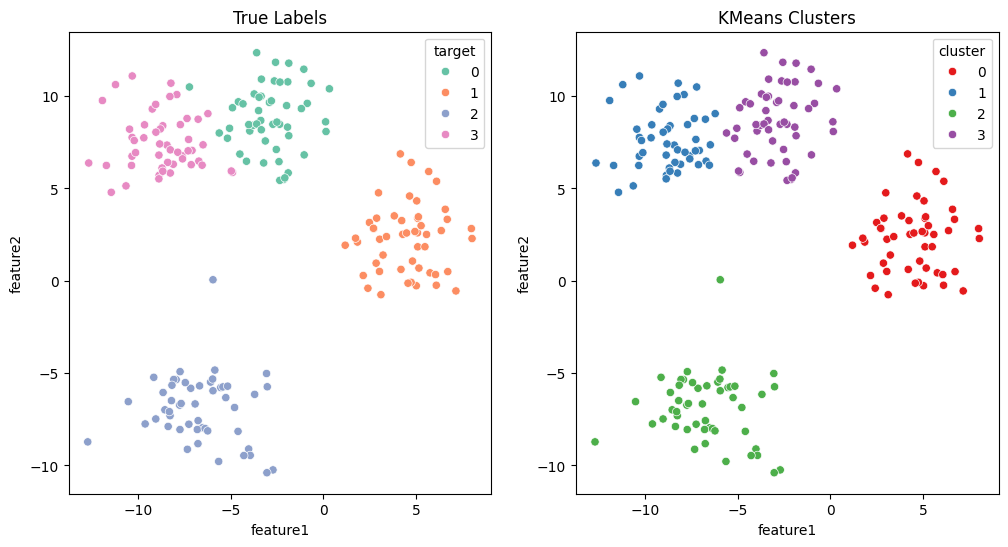

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original data with true labels
sns.scatterplot(data=df, x='feature1', y='feature2', hue='target', ax=axes[0], palette='Set2')
axes[0].set_title('True Labels')

# KMeans clustered data
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster', ax=axes[1], palette='Set1')
axes[1].set_title('KMeans Clusters')